In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
import seaborn as sns
from sklearn.datasets import make_blobs

In [52]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3)

In [53]:
X


array([[  7.73432699, -10.13639861],
       [ -4.05297743,  -5.40760296],
       [  5.24668013, -10.64833258],
       ...,
       [  5.6233764 , -10.49103329],
       [ -4.05073295,  -3.11118929],
       [ -0.59818706,   7.48758811]])

In [54]:
y

array([1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0,
       0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2,
       0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1,
       2, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1,
       1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0,
       1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 1, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 0, 2,
       2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0,

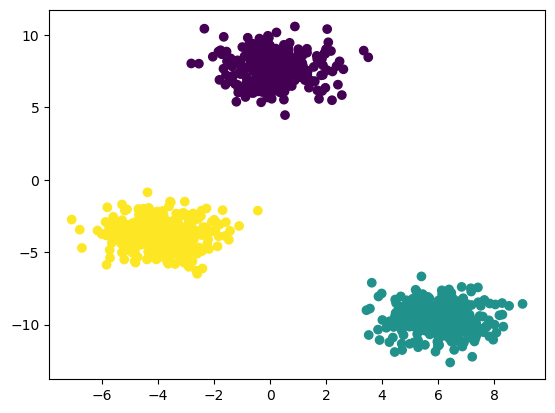

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [56]:
## Train and test split
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [57]:
## Standardization
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

In [58]:
X_Train_scaled = standard.fit_transform(X_train)
x_test_scaled = standard.transform(x_test)

In [59]:
from sklearn.cluster import KMeans


In [60]:
## Use Elbow method to select the K value
wcss = []

for k in range(1,11):
    kmean = KMeans(n_clusters=k, init='k-means++')
    kmean.fit(X_Train_scaled)
    wcss.append(kmean.inertia_)

wcss

[1340.0000000000014,
 443.4896831970875,
 51.321976083587394,
 44.537655280867355,
 36.69763161231697,
 26.969008993713917,
 28.92345969845268,
 23.57848208363785,
 19.918459116648695,
 18.74265875821721]

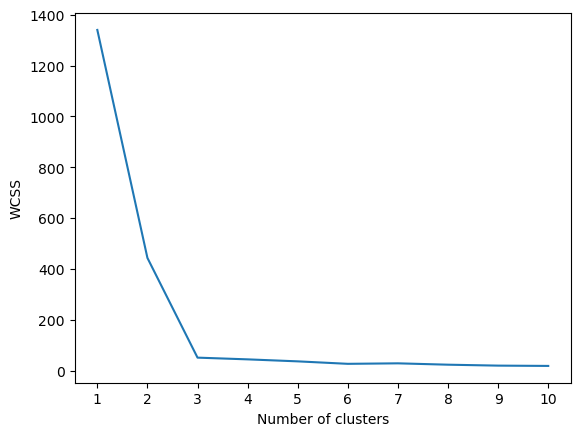

In [61]:
## Plot Elbow curve

plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [62]:
## Predict
kmeans = KMeans(n_clusters=3, init="k-means++")

In [63]:
kmeans.fit_predict(X_Train_scaled)

array([0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2,
       2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0,
       1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0,
       2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 2, 1,
       1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1,
       2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0,
       0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0,
       1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 2,

In [64]:
y_pred = kmeans.predict(x_test_scaled)

In [65]:
y_pred

array([0, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0,
       2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1,
       0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0,
       2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0,
       2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 1,

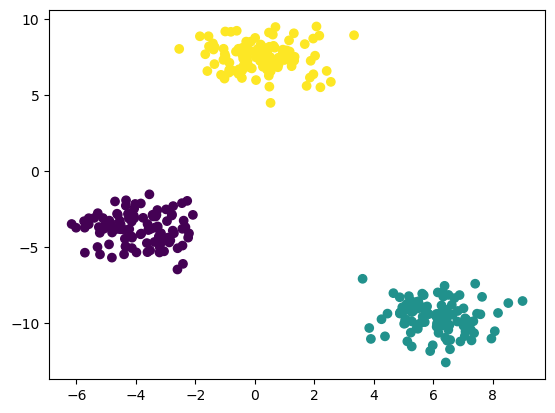

In [70]:
## Plotting
plt.scatter(x_test[:,0], x_test[:, 1], c=y_pred)

In [71]:
## Validating K values
## Kneelocator
## Silhoutee scoring



In [72]:
## Kneelocator
!pip install kneed

In [76]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve='convex', direction="decreasing")

In [75]:
kl.elbow

3

In [77]:
## Silhoutee scoring
from sklearn.metrics import silhouette_score

silhoutee_coefficient = []

In [78]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_Train_scaled)
    score = silhouette_score(X_Train_scaled, kmeans.labels_)
    silhoutee_coefficient.append(score)

In [79]:
silhoutee_coefficient

[0.6714524409454898,
 0.8333273727813815,
 0.693056217477316,
 0.5481808499959904,
 0.39638316897102255,
 0.38099722773719735,
 0.385972474234221,
 0.3359429019763966,
 0.33731882211406894]

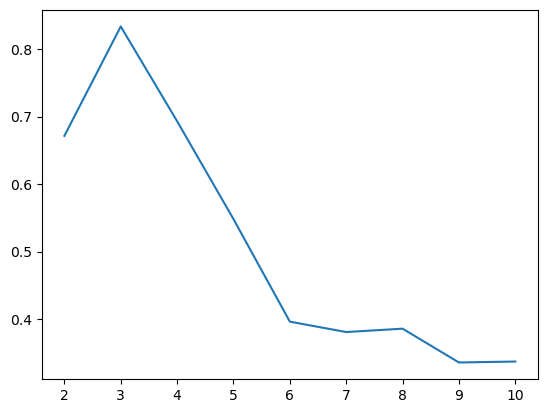

In [81]:
plt.plot(range(2,11), silhoutee_coefficient)